In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### First Neural Network (based on binary(0,1) data)

In [2]:
df=pd.read_csv(r"D:\DLDS\breast_cancer_mod.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


<BarContainer object of 2 artists>

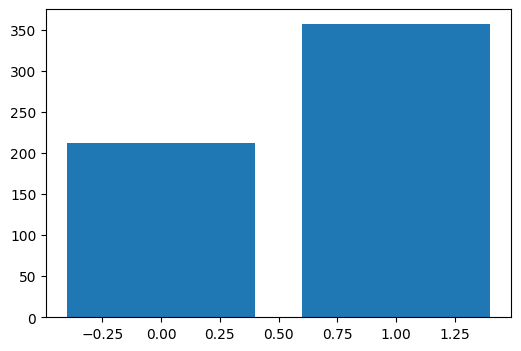

In [3]:
labels=["Malignant","Benign"]
fig,ax=plt.subplots(figsize=(6,4))
ax.bar(df['target'].value_counts().index,df['target'].value_counts().values)

In [4]:
for col in df.columns:
    print(f"{col}:{df[col].nunique()}")

mean radius:2
mean texture:2
mean perimeter:2
mean area:2
mean smoothness:2
mean compactness:2
mean concavity:2
mean concave points:2
mean symmetry:2
mean fractal dimension:2
radius error:2
texture error:2
perimeter error:2
area error:2
smoothness error:2
compactness error:2
concavity error:2
concave points error:2
symmetry error:2
fractal dimension error:2
worst radius:2
worst texture:2
worst perimeter:2
worst area:2
worst smoothness:2
worst compactness:2
worst concavity:2
worst concave points:2
worst symmetry:2
worst fractal dimension:2
target:2


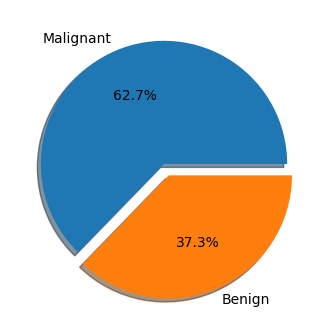

In [5]:
fig,ax=plt.subplots(figsize=(6,4))
explode=(0,0.1)
ax.pie(df['target'].value_counts(),explode=explode,labels=labels,autopct="%1.1f%%",shadow=True,startangle=0)
plt.show()

In [6]:
ax.pie?

Signature:
ax.pie(
    x,
    *,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    normalize=True,
    hatch=None,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A sequence of strings providing the labels for each wedge

colors : :mpltype:`color` or list of :mpltype:`color`, default: None
    A sequence of colors through which the 

In [7]:
X,y=df.drop('target',axis=1),df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [8]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)

X_train['target'] = y_train

X_train.sort_values('total',inplace=True)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0


In [9]:
X_test['total'] = X_test.astype(np.int16).sum(axis=1)

X_test['target'] = y_test

X_test.sort_values('total',inplace=True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
13,1,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,16,0
17,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,1,1,17,0


In [10]:
accuracy={}
for b in range(X_train.shape[1]):
    X_train['pred'] = X_train['total']>=b
    accuracy[b]=accuracy_score(X_train['target'],X_train['pred'])

In [11]:
best_b=max(accuracy,key=accuracy.get)
accuracy[best_b]

0.8592964824120602

In [12]:
X_test['pred']=X_test['total']>=best_b
accuracy_score(X_test['target'],X_test['pred'])

0.8421052631578947